## Load Data with Sanity Checks of Dataframe Columns

In [1]:
from CastleDefense.utils.visualizeFieldUtils import *
from CastleDefense.utils.extractPlayDataUtils import *
import matplotlib.pyplot as plt
from IPython.display import Video, display

gameId, playId, week = 2022090800, 343, 1

# SANITY CHECKS

play_df = load_play_data(playId, gameId, week)
print("Length Of play_df: ", len(play_df))

timesteps = len(play_df) / 23  # 22 players plus 1 football
print("Number of timesteps: ", timesteps)

num_of_frames = play_df['frameId'].unique().shape[0]   # Number of unique frames
max_frame_id = play_df['frameId'].max()  

print("Number of frames: ", num_of_frames)
print("Max frameId: ", max_frame_id)

play_df['time'] = pd.to_datetime(play_df['time'])
time_of_play = play_df['time'].max() - play_df['time'].min()
print("Time of play: ", time_of_play)

ValueError: can only convert an array of size 1 to a Python scalar

In [2]:
play_df.head()  # Show first 6 rows

NameError: name 'play_df' is not defined

## Create Football Field Visualization

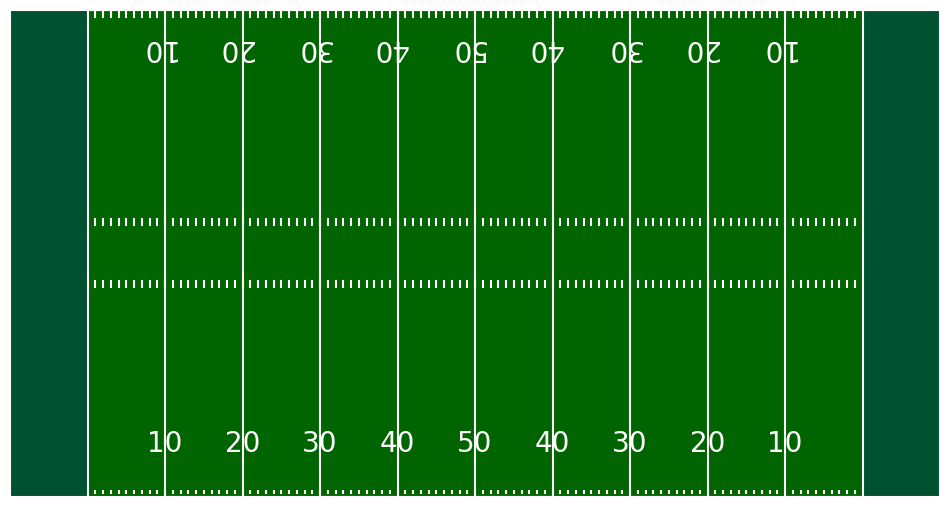

In [3]:
plt.close()
fig, ax = create_football_field()
plt.show()

## Show Tracking Data at Events

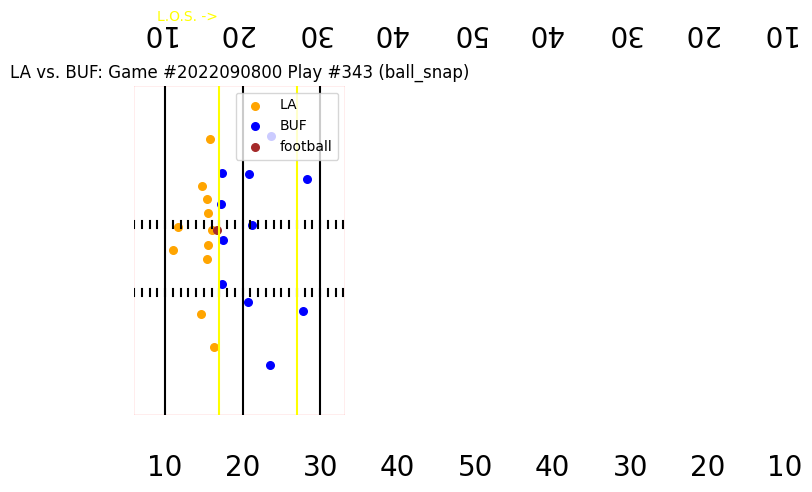

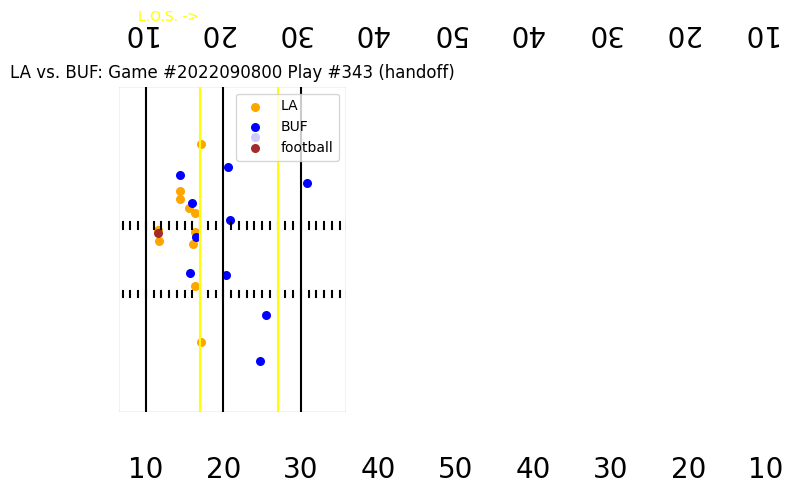

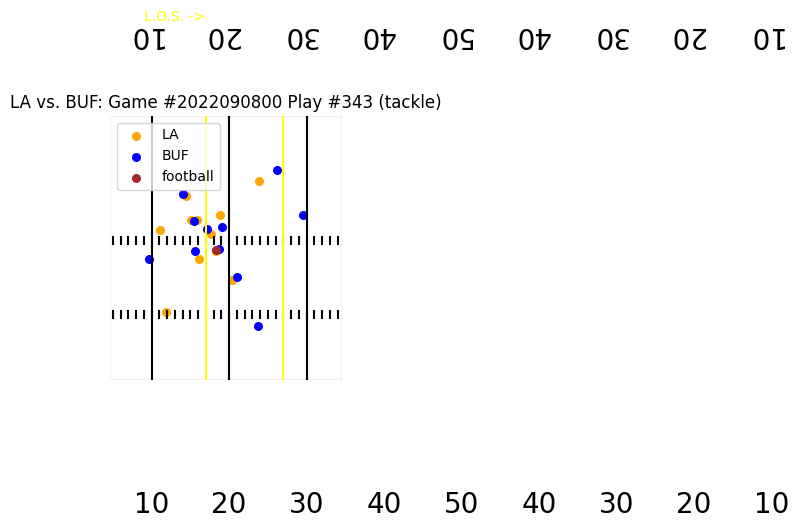

In [4]:
plot_play_events(playId, gameId, week, zoomed_view= True) 

## Show Movement from Player Tracking Data

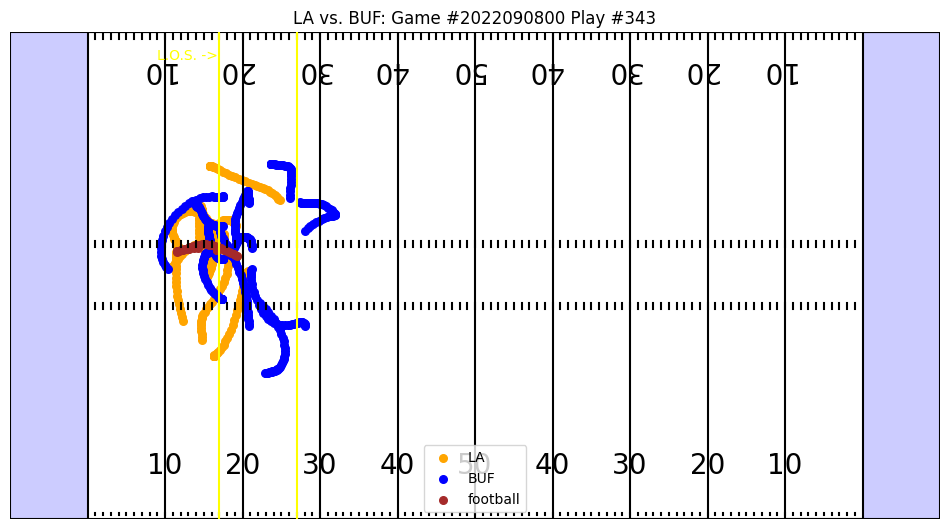

In [5]:
plot_play_tracked_movements(playId, gameId, week)

## Create and Save tracking data Animation from play


SyntaxError: invalid syntax (<unknown>, line 1)

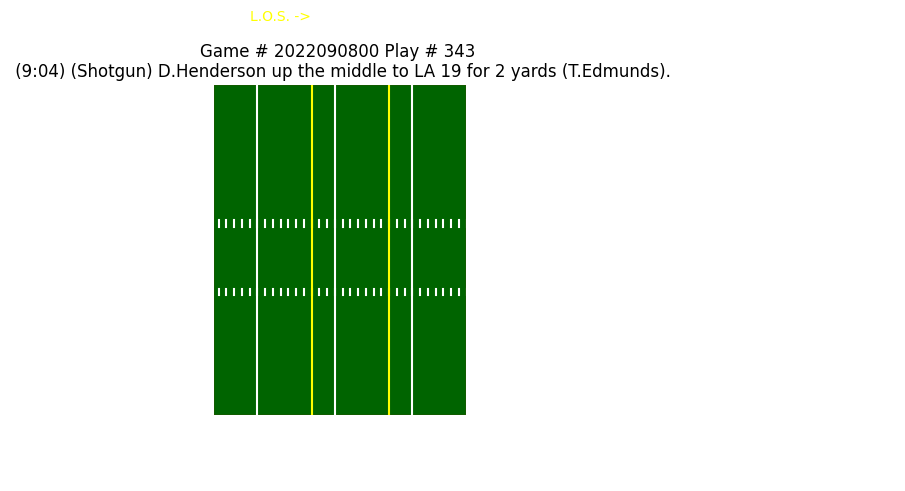

In [6]:
import time
plt.close()
anim = animate_player_movement(gameId=gameId, playId=playId, weekNumber=week, zoomed_view=True)
animation_name = 'animation_' + time.strftime("%Y%m%d_%H%M") + '.mp4'
animation_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'output')), animation_name)
print(animation_path)
save_animation(anim, animation_path)

plt.show()

In [7]:
Video(animation_path, embed=True)
## This works if you open the notebook in browser

NameError: name 'animation_path' is not defined